In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# "Top 3" Poll Results
### Pooled responses from all breakout rooms

In [48]:
top3 = pd.read_csv('top_3_poll.csv')
top3.columns=['Timestamp','Group','Selections']
top3.head()

,Timestamp,Group,Selections
0,6/9/2020 16:38,ISD,1 - Reinforce consistent performance and behav...
1,6/9/2020 16:39,ISD,2 - Improve staffing strategy to increase effi...
2,6/9/2020 16:39,ISD,1 - Reinforce consistent performance and behav...
3,6/9/2020 16:39,ISD,3 - Establish an employee development and succ...
4,6/9/2020 16:40,ISD,1 - Reinforce consistent performance and behav...


In [49]:
# one hot encoding of objectives
top3['Selections'] = top3.Selections.str.split(', ')
for index, row in top3.iterrows():
    for obj in row['Selections']:
        top3.at[index, obj] = 1
top3 = top3.fillna(0)
top3.drop('Selections', axis=1, inplace=True)
top3.head()

,Timestamp,Group,1 - Reinforce consistent performance and behavioral standards to achieve greater efficiency and fairness,2 - Improve staffing strategy to increase efficiency and reduce staff burnout,3 - Establish an employee development and succession planning strategy to keep pace with future organizational needs,4 - Improve cross-organizational accountability through the use of more effective change management processes and approaches,6 - Build higher levels of trust and communication between workgroups and departments,5 - Continue to build leadership capabilities that support a workplace of choice environment,7 - Build greater trust in the promotion process
0,6/9/2020 16:38,ISD,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6/9/2020 16:39,ISD,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,6/9/2020 16:39,ISD,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,6/9/2020 16:39,ISD,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,6/9/2020 16:40,ISD,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
objectives = list(top3.columns[2:top3.shape[1]])
poll_results = top3[objectives].sum().sort_values(ascending=True)
obj_rank = list(poll_results.index)

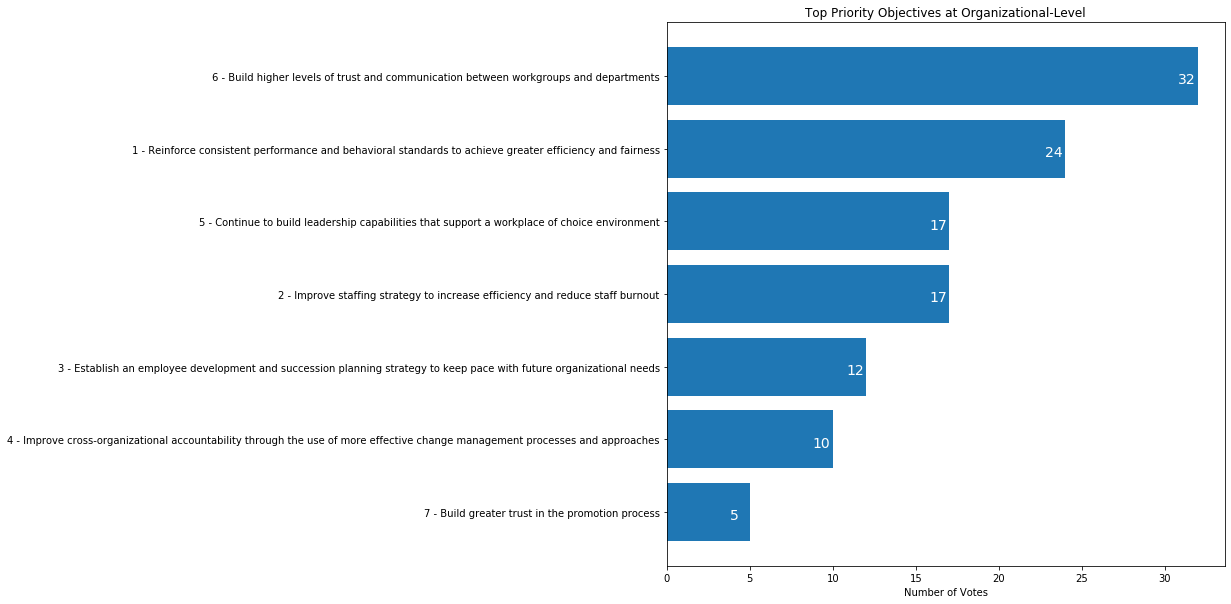

In [9]:
plt.figure(figsize=(10,10))
plt.barh(obj_rank, poll_results)
plt.title('Top Priority Objectives at Organizational-Level')
plt.xlabel('Number of Votes')
for y, result in enumerate(poll_results):
    plt.text(result-1.2, y-.1, int(result), fontsize=14, color='white')

plt.show()

# Impact & Capability Poll
### Pooled responses from all breakout rooms

In [10]:
criteria = pd.read_csv('criteria_poll.csv')
criteria.drop('Timestamp', axis=1, inplace=True)
criteria.columns=['Group',
                  'Obj1-Impact','Obj1-Capability',
                  'Obj2-Impact','Obj2-Capability',
                  'Obj3-Impact','Obj3-Capability',
                  'Obj4-Impact','Obj4-Capability',
                  'Obj5-Impact','Obj5-Capability',
                  'Obj6-Impact','Obj6-Capability',
                  'Obj7-Impact','Obj7-Capability']
criteria.head()

,Group,Obj1-Impact,Obj1-Capability,Obj2-Impact,Obj2-Capability,Obj3-Impact,Obj3-Capability,Obj4-Impact,Obj4-Capability,Obj5-Impact,Obj5-Capability,Obj6-Impact,Obj6-Capability,Obj7-Impact,Obj7-Capability
0,Regional San Ops Non-O&M,High,High,Low,Low,Medium,Medium,Low,Low,High,Medium,High,High,Medium,Medium
1,Regional San Ops Non-O&M,Medium,Low,High,High,Medium,Medium,Medium,Medium,High,Low,Medium,Low,High,High
2,Regional San Ops Non-O&M,High,Low,Medium,Medium,High,Low,High,Medium,Medium,High,High,Medium,Medium,Medium
3,Regional San Ops Non-O&M,High,Medium,Medium,Medium,High,Medium,Medium,Low,High,Medium,High,Low,Low,Medium
4,Regional San Ops Non-O&M,High,Low,High,Medium,Medium,High,Medium,Low,Medium,High,High,Low,Low,High


In [11]:
criteria.shape

(36, 15)

In [12]:
criteria.replace('Low', 1, inplace=True)
criteria.replace('Medium', 2, inplace=True)
criteria.replace('High', 3, inplace=True)
criteria.head()

,Group,Obj1-Impact,Obj1-Capability,Obj2-Impact,Obj2-Capability,Obj3-Impact,Obj3-Capability,Obj4-Impact,Obj4-Capability,Obj5-Impact,Obj5-Capability,Obj6-Impact,Obj6-Capability,Obj7-Impact,Obj7-Capability
0,Regional San Ops Non-O&M,3.0,3.0,1,1,2,2,1.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0
1,Regional San Ops Non-O&M,2.0,1.0,3,3,2,2,2.0,2.0,3.0,1.0,2.0,1.0,3.0,3.0
2,Regional San Ops Non-O&M,3.0,1.0,2,2,3,1,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0
3,Regional San Ops Non-O&M,3.0,2.0,2,2,3,2,2.0,1.0,3.0,2.0,3.0,1.0,1.0,2.0
4,Regional San Ops Non-O&M,3.0,1.0,3,2,2,3,2.0,1.0,2.0,3.0,3.0,1.0,1.0,3.0


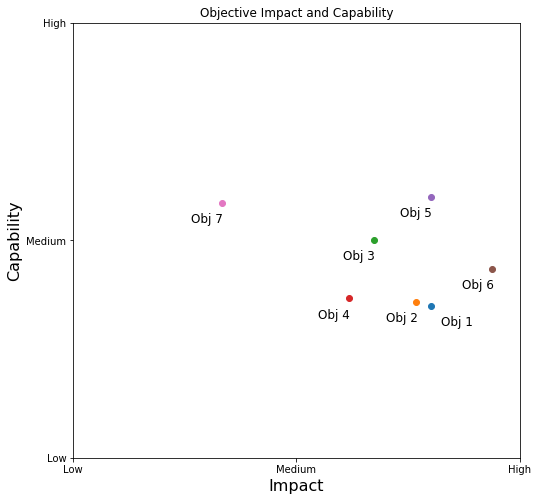

In [13]:
dim = [1.25, 2.75]
ticks = [1.12, 2, 2.88]

plt.figure(figsize=(8,8),
           facecolor='None')
plt.xlim(dim)
plt.ylim(dim)
plt.xticks(ticks,('Low','Medium','High'))
plt.yticks(ticks,('Low','Medium','High'))
plt.xlabel('Impact', fontsize=16)
plt.ylabel('Capability', fontsize=16)

for i in range(1,8):
    xdata='Obj'+str(i)+'-Impact'
    ydata='Obj'+str(i)+'-Capability'
    x=criteria[xdata].mean()
    y=criteria[ydata].mean()
    plt.scatter(x, y)
    if i!=1:
        plt.text(x-.12, y-.08, 'Obj '+str(i), fontsize=12)
    else:
        plt.text(x+.04, y-.08, 'Obj '+str(i), fontsize=12)

plt.title('Objective Impact and Capability')

#plt.legend(('Objective 1','Objective 2', 'Objective 3', 'Objective 4', 'Objective 5', 'Objective 6', 'Objective 7'))
plt.show()

## Updated version of plot
From plot function (below)

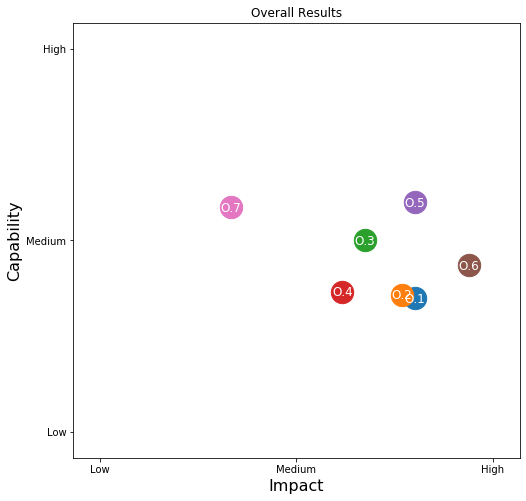

In [40]:
criteria_plot(criteria,'Overall Results')

# "Top 3" Poll Results
### Broken down by breakout room

In [15]:
groups = list(top3.Group.unique())
groups

['ISD',
 'Policy & Planning',
 'Regional San Ops Non-O&M',
 'Regional San Ops O&M',
 'SASD Ops']

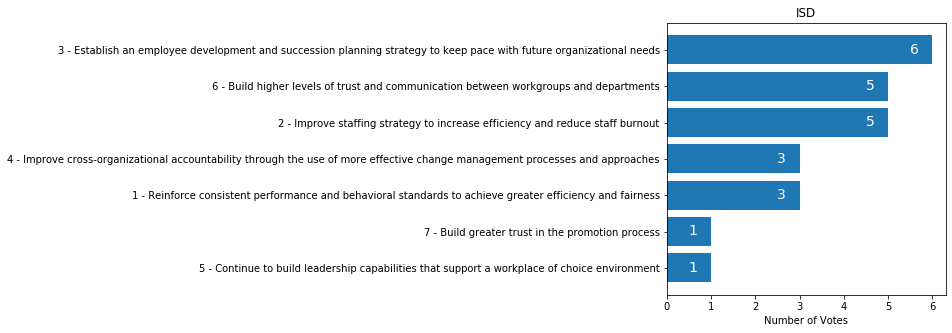

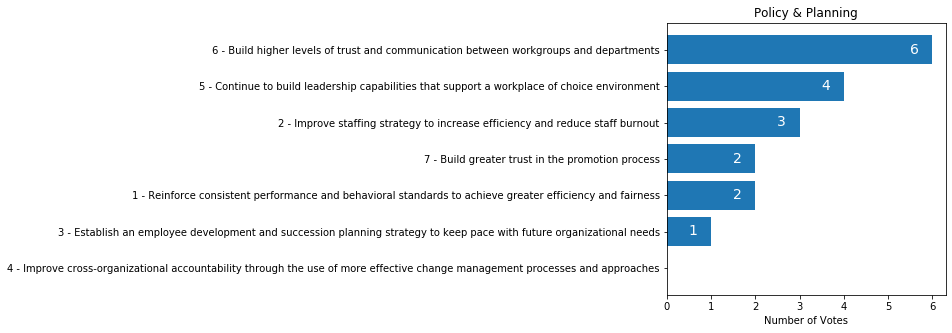

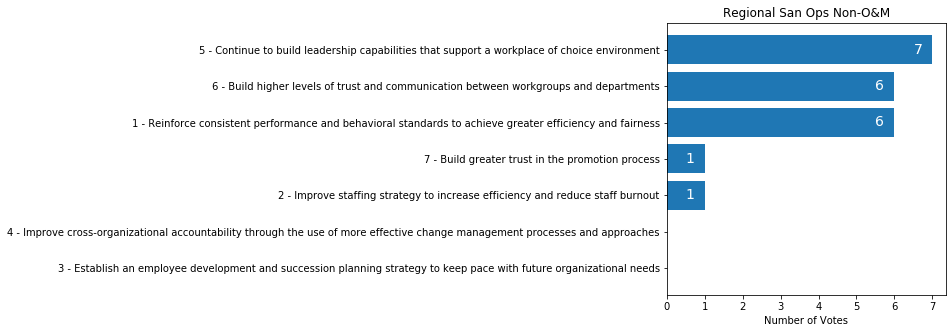

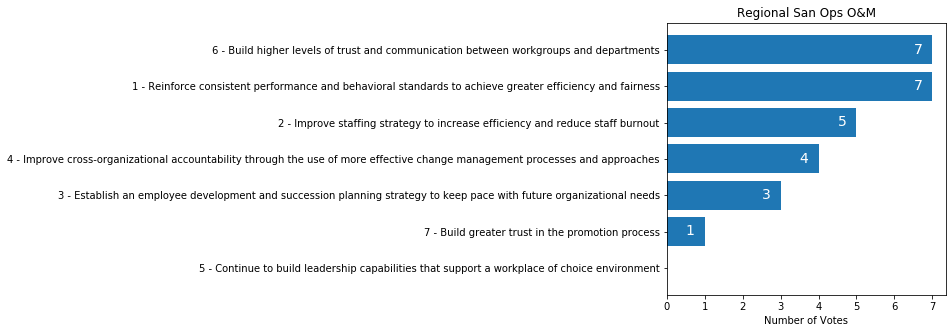

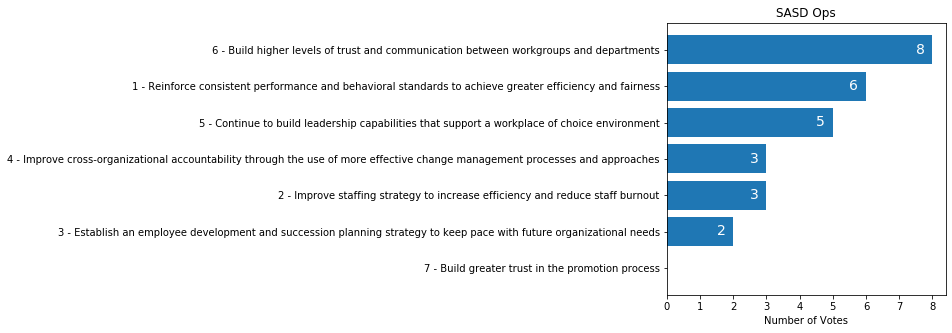

In [19]:
for group in groups:
    temp_df = top3[top3.Group==group]
    poll_results = temp_df[objectives].sum().sort_values(ascending=True)
    obj_rank = list(poll_results.index)
    plt.figure(figsize=(5,5))
    plt.barh(obj_rank, poll_results)
    plt.title(group)
    plt.xlabel('Number of Votes')
    for y, result in enumerate(poll_results):
        if result>0: plt.text(result-0.5, y-.1, int(result), fontsize=14, color='white')
    plt.show()

# Impact & Capability Poll Results
### Broken down by breakout room

In [45]:
# Define a function to plot results

def criteria_plot(df, title_name):
    dim = [0.9, 3.1]
    ticks = [1.12, 2, 2.88]

    plt.figure(figsize=(8,8),
               facecolor='None')
    plt.xlim(dim)
    plt.ylim(dim)
    plt.xticks(ticks,('Low','Medium','High'))
    plt.yticks(ticks,('Low','Medium','High'))
    plt.xlabel('Impact', fontsize=16)
    plt.ylabel('Capability', fontsize=16)

    for i in range(1,8):
        xdata='Obj'+str(i)+'-Impact'
        ydata='Obj'+str(i)+'-Capability'
        x=df[xdata].mean()
        y=df[ydata].mean()
        plt.scatter(x, y, s=500)
        plt.text(x-.045,y-.02, 'O.'+str(i), fontsize=12, color='white')

    plt.title(title_name)

    #plt.legend(('Objective 1','Objective 2', 'Objective 3', 'Objective 4', 'Objective 5', 'Objective 6', 'Objective 7'))
    plt.show()

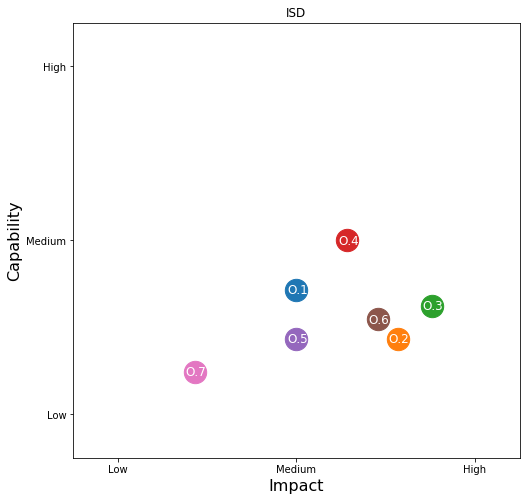

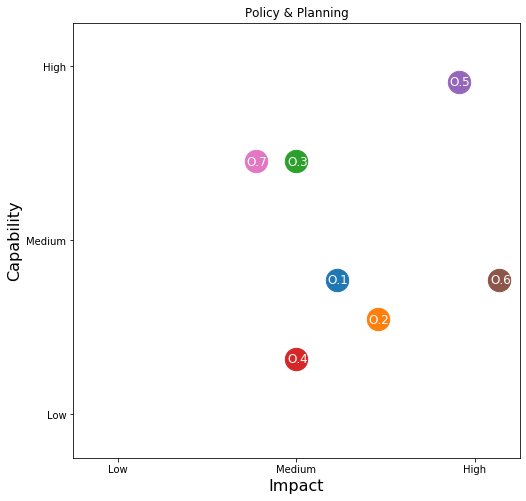

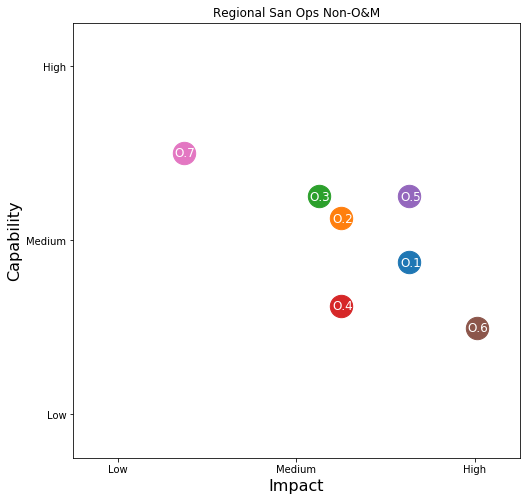

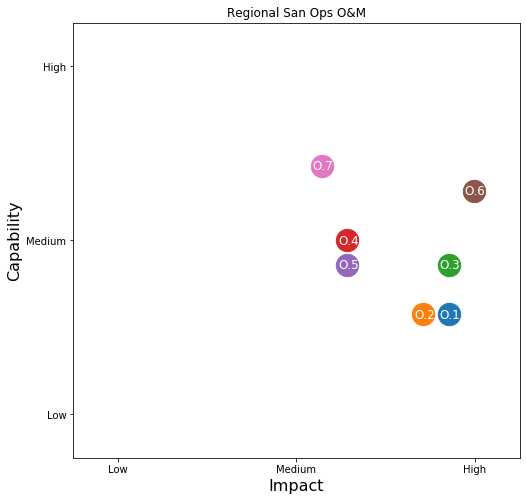

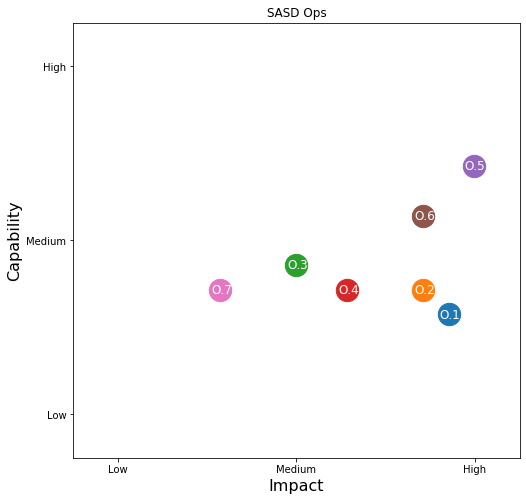

In [46]:
# Call the plot function for each breakout room

for group in groups:
    temp_df = criteria[criteria.Group==group]
    criteria_plot(temp_df,group)

## Just for fun...
### Overall results and breakout results on the same plot

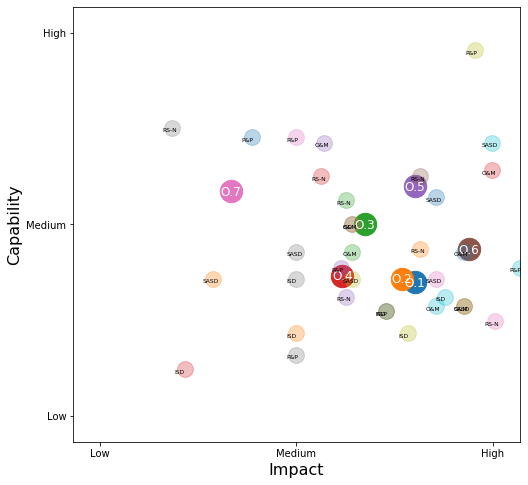

In [42]:
group_abv = {'ISD':'ISD',
             'Policy & Planning':'P&P',
             'Regional San Ops Non-O&M': 'RS-N',
             'Regional San Ops O&M': 'O&M',
             'SASD Ops':'SASD'}

dim = [1, 3]
ticks = [1.12, 2, 2.88]

plt.figure(figsize=(8,8),
           facecolor='None')
plt.xlim(dim)
plt.ylim(dim)
plt.xticks(ticks,('Low','Medium','High'))
plt.yticks(ticks,('Low','Medium','High'))
plt.xlabel('Impact', fontsize=16)
plt.ylabel('Capability', fontsize=16)

for i in range(1,8):
    xdata='Obj'+str(i)+'-Impact'
    ydata='Obj'+str(i)+'-Capability'
    x=criteria[xdata].mean()
    y=criteria[ydata].mean()
    plt.scatter(x, y, s=500)
    plt.text(x-.045,y-.02, 'O.'+str(i), fontsize=12, color='white')

#plt.title(title_name)

for group in groups:
    temp_df = criteria[criteria.Group==group]
    for i in range(1,8):
        xdata='Obj'+str(i)+'-Impact'
        ydata='Obj'+str(i)+'-Capability'
        x=temp_df[xdata].mean()
        y=temp_df[ydata].mean()
        plt.scatter(x, y, s=250, alpha=0.3)
        plt.text(x-.045,y-.02, group_abv[group], fontsize=6, color='black')

    
    
plt.show()

### Nope!
The colors don't match and it's way too confusing anyway.